In [ ]:
# %load import.py
import ILPmodel as ILP
import ILPtry as ILPtry
from skimage.filters import gaussian
import time
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)
%reload_ext autoreload
%autoreload 2
from tifffile import imread, imsave
import cPickle as pickle

Stack shape: (75, 2, 356, 610)
Segchannel shape: (75, 356, 610)
Single image: (356, 610)


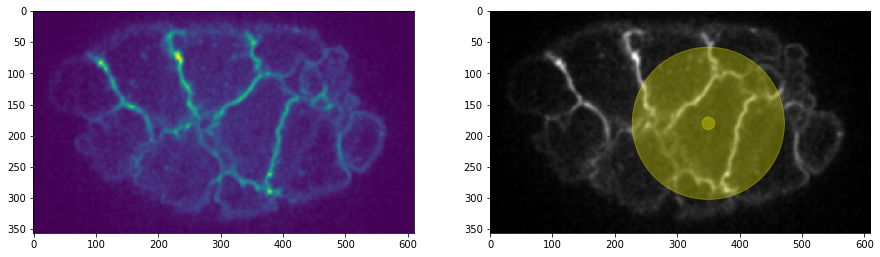

In [2]:
#%%capture
#name = '4MyosinMembraneWholeEmbryo'
#name ='MAX_LP320-06-08_Concat-1-50'
name = '4MyosinMembraneWholeEmbryo'
filename = '/home/agupta/BobSeg/data/' +name + '.tif'
stack = imread(filename)
center = (350,180)
#center = (170, 250)
##############################################
print 'Stack shape:',stack.shape
segchannel = stack[:,0,:,:]
sigma = [0.,2.,2.]
segchannel_smooth = gaussian(segchannel,sigma)
print 'Segchannel shape:',segchannel.shape
print 'Single image:',segchannel[0].shape

##############################################
max_radius = (segchannel[0].shape[1] / 5,
          segchannel[0].shape[1] / 5)
min_radius = (10,10)
segimages = segchannel_smooth
images = [None] * segimages.shape[0]
for i in range (segimages.shape[0]):
    images[i] = segimages[i]     
fig = plt.figure()
ax = plt.subplot(121)    
ax.imshow(images[1])
################################################
frame = 0
ax = plt.subplot(122)
ax.imshow(images[frame], plt.get_cmap('gray'))
patches = [] # collects patches to be plotted
patches.append( ILP.Ellipse((center[0],center[1]),
                        width=(min_radius[0]*2),
                        height=(min_radius[1])*2) )
patches.append( ILP.Ellipse((center[0],center[1]),
                        width=(max_radius[0]*2),
                        height=(max_radius[1]*2)) )
p = ILP.PatchCollection(patches, cmap=matplotlib.cm.jet, alpha=0.3, color='yellow')
ax.add_collection(p)

In [3]:
#%%capture
k_values = [5, 10, 20, 30, 40, 50]
model3_seconds = []
model3_seconds_model = []
objective_fn_values = []
for K in k_values:
    start_time = time.time()
    N = 60
    #K = 30
    print K, "going on"
    max_delta_k = 4
    max_delta_time = 2
    T = segimages.shape[0]
    #T = 5
    alpha = 1
    alpha_t =0
    beta= 0.0005
    beta_t=0
    nodes = N * K

    w = ILPtry.compute_vertex_cost(T, N, K, images, center, min_radius, max_radius)
    w_edge = ILPtry.compute_edge_cost(T, N, K, max_delta_k, alpha, beta, w)
    w_e = ILPtry.compute_temporal_edge_cost(T, N, K, max_delta_time, alpha_t, beta_t, w)
    #m, vv, ve = ILP.test_model_without_temporal(T, N, K, w, w_edge)
    #m, vv, ve = ILPtry.build_model(T, N, K, w, w_edge, w_e)
    #m, vv, ve = ILP.build_model_less_constraint(T, N, K, w, w_edge, w_e)
    #m, ve, ve_index = ILP.build_model_less_constraint(T, N, K, w, w_edge, w_e)
    m, ve, ve_index = ILPtry.build_model_improved_constraint(T, N, K, w, w_edge, w_e)
    m.optimize()
    
    objective_fn_values.append(m.ObjBound)
    model3_seconds.append(time.time() - start_time)
    model3_seconds_model.append(m.Runtime)

5 going on

DEFINING VARIABLES AND COSTS and SETTING OBJECTIVE FUNCTION . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
SETTING CONSTRAINTS 

|Vv| =  22500
|Ve| =  196860
|CONSTRAINTS| =  53340
Optimize a model with 53340 rows, 196860 columns and 588300 nonzeros
Variable types: 0 continuous, 196860 integer (196860 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-05, 8e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective -1882.14
Presolve removed 52980 rows and 195360 columns
Presolve time: 1.03s
Presolved: 360 rows, 1500 columns, 4500 nonzeros
Found heuristic solution: objective -3406.007862
Variable types: 0 continuous, 1500 integer (1500 binary)

Root relaxation: objective -3.416591e+03, 62 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work


In [3]:
#%%capture
k_values = [5, 10, 20, 30, 40, 50]
model1_seconds = []
model1_seconds_model = []
objective1_fn_values = []
for K in k_values:
    start_time = time.time()
    N = 60
    #K = 30
    print K, "going on"
    max_delta_k = 4
    max_delta_time = 2
    T = segimages.shape[0]
    #T = 5
    alpha = 1
    alpha_t =0
    beta= 0.0005
    beta_t=0
    nodes = N * K

    w = ILPtry.compute_vertex_cost(T, N, K, images, center, min_radius, max_radius)
    w_edge = ILPtry.compute_edge_cost(T, N, K, max_delta_k, alpha, beta, w)
    w_e = ILPtry.compute_temporal_edge_cost(T, N, K, max_delta_time, alpha_t, beta_t, w)
    m, vv, ve = ILPtry.test_model_without_temporal(T, N, K, w, w_edge)
    #m, vv, ve = ILPtry.build_model(T, N, K, w, w_edge, w_e)
    #m, vv, ve = ILP.build_model_less_constraint(T, N, K, w, w_edge, w_e)
    #m, ve, ve_index = ILP.build_model_less_constraint(T, N, K, w, w_edge, w_e)
    #m, ve, ve_index = ILPtry.build_model_improved_constraint(T, N, K, w, w_edge, w_e)
    m.optimize()
    
    objective1_fn_values.append(m.ObjBound)
    model1_seconds.append(time.time() - start_time)
    model1_seconds_model.append(m.Runtime)

5 going on

DEFINING VARIABLES AND COSTS and SETTING OBJECTIVE FUNCTION . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
SETTING CONSTRAINTS 

|Vv| =  22500
|Ve| =  112500
|CONSTRAINTS| =  22500
Optimize a model with 22500 rows, 112500 columns and 225000 nonzeros
Variable types: 0 continuous, 112500 integer (112500 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-05, 7e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]
Found heuristic solution: objective 0
Found heuristic solution: objective -20611.8

Explored 0 nodes (0 simplex iterations) in 0.03 seconds
Thread count was 1 (of 56 available processors)

Solution count 2: -20611.8 0 

Optimal solution found (tolerance 1.00e-04)
Best objective -2.061180980543e+04, best bound -2.061204336059e+04, gap 0.0011%
10 going on

DEFINING VARIABLES AND COSTS and SETTING OBJECTIVE FUNCT

In [10]:
print seconds
model2_total_time = seconds[::2]
model2_solver_time = seconds[1::2]
print model2_total_time
print model2_solver_time
print objective_fn_values

[14.350265979766846, 3.949079990386963, 32.883450984954834, 10.972957849502563, 83.19020104408264, 33.76024103164673, 143.04348802566528, 60.79502511024475, 247.02049112319946, 117.51460695266724, 369.6440460681915, 183.55911302566528]
[14.350265979766846, 32.883450984954834, 83.19020104408264, 143.04348802566528, 247.02049112319946, 369.6440460681915]
[3.949079990386963, 10.972957849502563, 33.76024103164673, 60.79502511024475, 117.51460695266724, 183.55911302566528]
[-1700.359495559673, -1683.7672869865235, -1643.5698174755698, -1619.9290793313564, -1604.0675064677666, -1590.022075393393]


In [2]:
model2_total_time =[14.350265979766846, 32.883450984954834, 83.19020104408264, 143.04348802566528, 247.02049112319946, 369.6440460681915]
model2_solver_time = [3.949079990386963, 10.972957849502563, 33.76024103164673, 60.79502511024475, 117.51460695266724, 183.55911302566528]


In [3]:
model3_seconds= [9.38044285774231, 19.953197956085205, 45.5043728351593, 76.58042693138123, 116.10658097267151, 177.66953802108765]

model3_seconds_model=[1.153442144393921, 3.081921100616455, 7.0569679737091064, 11.478356838226318, 15.839916944503784, 20.49695110321045]


In [6]:

model1_seconds=[5.998434066772461, 11.643947124481201, 25.504521131515503, 41.30572199821472, 65.51938199996948, 105.83523297309875]

model1_seconds_model=[0.04967999458312988, 0.08574914932250977, 0.17170381546020508, 0.2560079097747803, 0.3463129997253418, 0.4451448917388916]

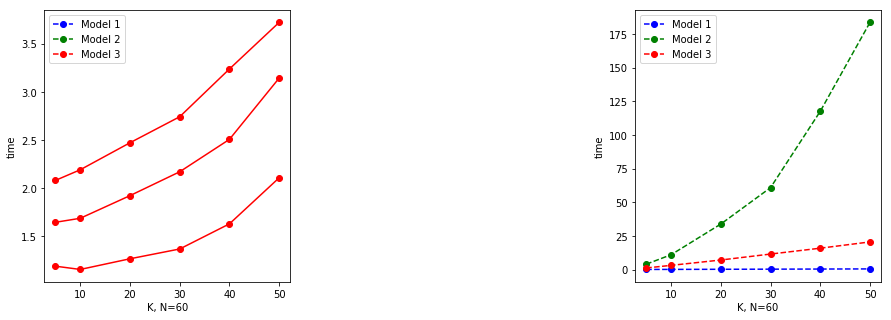

In [26]:
def dif (a,b):
    return [i - j for i, j in zip(a, b)]
rcParams['figure.figsize'] = 15, 5

def divi(a,b):
    return [i/j for i, j in zip(a, b)]
ax = plt.subplot(131)
ax.set_xlabel('K, N=60')
ax.set_ylabel('time')
#m1,=plt. plot(k_values, model1_seconds,linestyle='-', marker='o', color='b', label = 'Model 1')

#plt. plot(k_values, model1_seconds_model,linestyle='--', marker='o', color='b')
#m2,=plt. plot(k_values, model2_total_time,linestyle='-', marker='o', color='g', label = 'Model 2')
#plt. plot(k_values, model2_solver_time,linestyle='--', marker='o', color='g')
#m3,=plt. plot(k_values, model3_seconds,linestyle='-', marker='o', color='r', label = 'Model 3')
#plt. plot(k_values, model3_seconds_model,linestyle='--', marker='o', color='r')

#dif1,=plt. plot(k_values, dif(model1_seconds,model1_seconds_model ),linestyle='-', marker='o', color='b', label = 'Model 1')
#dif2,=plt. plot(k_values, dif(model2_total_time,model2_solver_time ),linestyle='-', marker='o', color='b', label = 'Model 1')
#dif3,=plt. plot(k_values, dif(model3_seconds,model3_seconds_model ),linestyle='-', marker='o', color='b', label = 'Model 1')
dif1,=plt. plot(k_values, divi(dif(model1_seconds,model1_seconds_model ), k_values),linestyle='-', marker='o', color='r', label = 'Model 1')
dif2,=plt. plot(k_values, divi(dif(model2_total_time,model2_solver_time ), k_values),linestyle='-', marker='o', color='r', label = 'Model 1')
dif3,=plt. plot(k_values, divi(dif(model3_seconds,model3_seconds_model ), k_values),linestyle='-', marker='o', color='r', label = 'Model 1')

plt.legend(handles=[m1, m2, m3])


ax = plt.subplot(133)
ax.set_xlabel('K, N=60')
ax.set_ylabel('time')
#plt. plot(k_values, model1_seconds,linestyle='-', marker='o', color='b')
m1,=plt. plot(k_values, model1_seconds_model,linestyle='--', marker='o', color='b', label = 'Model 1')
#plt. plot(k_values, model2_total_time,linestyle='-', marker='o', color='g')
m2,=plt. plot(k_values, model2_solver_time,linestyle='--', marker='o', color='g', label = 'Model 2')
#plt. plot(k_values, model3_seconds,linestyle='-', marker='o', color='r')
m3,=plt. plot(k_values, model3_seconds_model,linestyle='--', marker='o', color='r', label = 'Model 3')
#plt.plot(k_values, objective_fn_values, linestyle='--', marker='o', color='b')
plt.legend(handles=[m1, m2, m3])

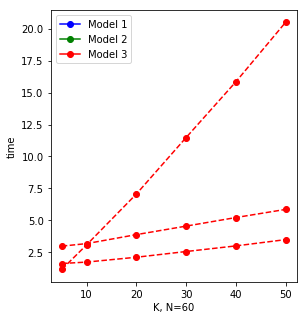

In [21]:
ax = plt.subplot(131)
ax.set_xlabel('K, N=60')
ax.set_ylabel('time')
#m1,=plt. plot(k_values, model1_seconds,linestyle='-', marker='o', color='b', label = 'Model 1')
#plt. plot(k_values, model1_seconds_model,linestyle='--', marker='o', color='b')
#m2,=plt. plot(k_values, model2_total_time,linestyle='-', marker='o', color='g', label = 'Model 2')
#plt. plot(k_values, model2_solver_time,linestyle='--', marker='o', color='g')
#m3,=plt. plot(k_values, model3_seconds,linestyle='-', marker='o', color='r', label = 'Model 3')
plt. plot(k_values, model3_seconds_model,linestyle='--', marker='o', color='r')
plt. plot(k_values, s_max,linestyle='--', marker='o', color='r')
plt. plot(k_values, s_myo,linestyle='--', marker='o', color='r')

plt.legend(handles=[m1, m2, m3])


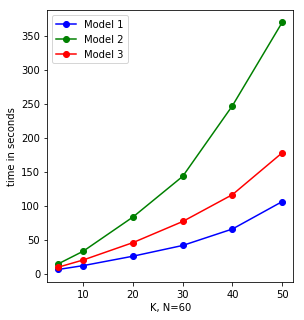

In [31]:
ax = plt.subplot(131)
ax.set_xlabel('K, N=60')
ax.set_ylabel('time in seconds')
m1,=plt. plot(k_values, model1_seconds,linestyle='-', marker='o', color='b', label = 'Model 1')

#plt. plot(k_values, model1_seconds_model,linestyle='--', marker='o', color='b')
m2,=plt. plot(k_values, model2_total_time,linestyle='-', marker='o', color='g', label = 'Model 2')
#plt. plot(k_values, model2_solver_time,linestyle='--', marker='o', color='g')
m3,=plt. plot(k_values, model3_seconds,linestyle='-', marker='o', color='r', label = 'Model 3')
#plt. plot(k_values, model3_seconds_model,linestyle='--', marker='o', color='r')

#dif1,=plt. plot(k_values, dif(model1_seconds,model1_seconds_model ),linestyle='-', marker='o', color='b', label = 'Model 1')
#dif2,=plt. plot(k_values, dif(model2_total_time,model2_solver_time ),linestyle='-', marker='o', color='b', label = 'Model 1')
#dif3,=plt. plot(k_values, dif(model3_seconds,model3_seconds_model ),linestyle='-', marker='o', color='b', label = 'Model 1')
#dif1,=plt. plot(k_values, divi(dif(model1_seconds,model1_seconds_model ), k_values),linestyle='-', marker='o', color='r', label = 'Model 1')
#dif2,=plt. plot(k_values, divi(dif(model2_total_time,model2_solver_time ), k_values),linestyle='-', marker='o', color='r', label = 'Model 1')
#dif3,=plt. plot(k_values, divi(dif(model3_seconds,model3_seconds_model ), k_values),linestyle='-', marker='o', color='r', label = 'Model 1')

plt.legend(handles=[m1, m2, m3])

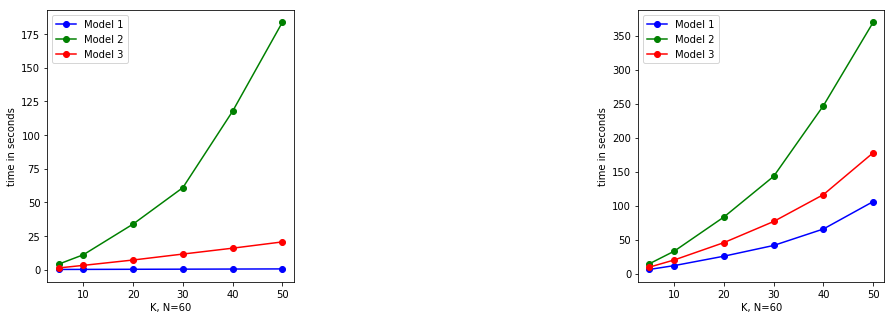

In [75]:
ax = plt.subplot(131)
ax.set_xlabel('K, N=60')
ax.set_ylabel('time in seconds')
#m1,=plt. plot(k_values, model1_seconds,linestyle='-', marker='o', color='b', label = 'Model 1')

m1,=plt. plot(k_values, model1_seconds_model,linestyle='-', marker='o', color='b', label = 'Model 1')
#m2,=plt. plot(k_values, model2_total_time,linestyle='-', marker='o', color='g', label = 'Model 2')
m2,=plt. plot(k_values, model2_solver_time,linestyle='-', marker='o', color='g', label = 'Model 2')
#m3,=plt. plot(k_values, model3_seconds,linestyle='-', marker='o', color='r', label = 'Model 3')
m3,=plt. plot(k_values, model3_seconds_model,linestyle='-', marker='o', color='r', label = 'Model 3')

#dif1,=plt. plot(k_values, dif(model1_seconds,model1_seconds_model ),linestyle='-', marker='o', color='b', label = 'Model 1')
#dif2,=plt. plot(k_values, dif(model2_total_time,model2_solver_time ),linestyle='-', marker='o', color='b', label = 'Model 1')
#dif3,=plt. plot(k_values, dif(model3_seconds,model3_seconds_model ),linestyle='-', marker='o', color='b', label = 'Model 1')
#dif1,=plt. plot(k_values, divi(dif(model1_seconds,model1_seconds_model ), k_values),linestyle='-', marker='o', color='r', label = 'Model 1')
#dif2,=plt. plot(k_values, divi(dif(model2_total_time,model2_solver_time ), k_values),linestyle='-', marker='o', color='r', label = 'Model 1')
#dif3,=plt. plot(k_values, divi(dif(model3_seconds,model3_seconds_model ), k_values),linestyle='-', marker='o', color='r', label = 'Model 1')

plt.legend(handles=[m1, m2, m3])

ax = plt.subplot(133)
ax.set_xlabel('K, N=60')
ax.set_ylabel('time in seconds')
m1,=plt. plot(k_values, model1_seconds,linestyle='-', marker='o', color='b', label = 'Model 1')

#m1,=plt. plot(k_values, model1_seconds_model,linestyle='--', marker='o', color='b', label = 'Model 1')
m2,=plt. plot(k_values, model2_total_time,linestyle='-', marker='o', color='g', label = 'Model 2')
#m2,=plt. plot(k_values, model2_solver_time,linestyle='--', marker='o', color='g', label = 'Model 2')
m3,=plt. plot(k_values, model3_seconds,linestyle='-', marker='o', color='r', label = 'Model 3')
#m3,=plt. plot(k_values, model3_seconds_model,linestyle='--', marker='o', color='r', label = 'Model 3')
plt.legend(handles=[m1, m2, m3])
savefig('/home/agupta/BobSeg/p4.png')

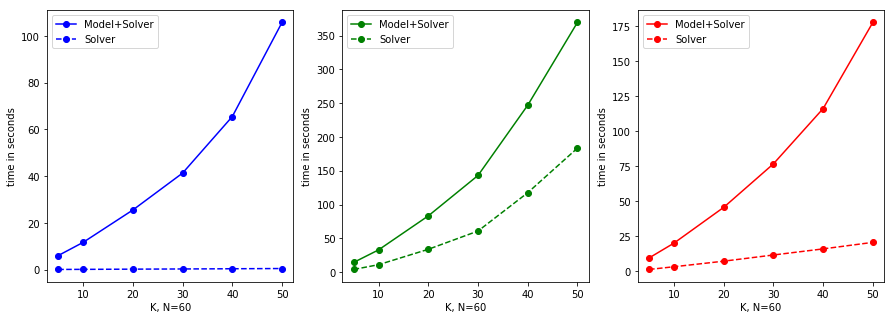

In [74]:
ax = plt.subplot(131)
ax.set_xlabel('K, N=60')
ax.set_ylabel('time in seconds')

m1ms,=plt. plot(k_values, model1_seconds,linestyle='-', marker='o', color='b', label = 'Model+Solver')
m1s,=plt. plot(k_values, model1_seconds_model,linestyle='--', marker='o', color='b', label = 'Solver')
plt.legend(handles=[m1ms, m1s])
ax = plt.subplot(132)
ax.set_xlabel('K, N=60')

ax.set_ylabel('time in seconds')
m2ms,=plt. plot(k_values, model2_total_time,linestyle='-', marker='o', color='g', label = 'Model+Solver')
m2s,=plt. plot(k_values, model2_solver_time,linestyle='--', marker='o', color='g', label = 'Solver')
plt.legend(handles=[m2ms, m2s])
ax = plt.subplot(133)
ax.set_xlabel('K, N=60')

ax.set_ylabel('time in seconds')
m3ms,=plt. plot(k_values, model3_seconds,linestyle='-', marker='o', color='r', label = 'Model+Solver')
m3s,=plt. plot(k_values, model3_seconds_model,linestyle='--', marker='o', color='r', label = 'Solver')
plt.legend(handles=[m3ms, m3s])
#dif1,=plt. plot(k_values, dif(model1_seconds,model1_seconds_model ),linestyle='-', marker='o', color='b', label = 'Model 1')
#dif2,=plt. plot(k_values, dif(model2_total_time,model2_solver_time ),linestyle='-', marker='o', color='b', label = 'Model 1')
#dif3,=plt. plot(k_values, dif(model3_seconds,model3_seconds_model ),linestyle='-', marker='o', color='b', label = 'Model 1')
#dif1,=plt. plot(k_values, divi(dif(model1_seconds,model1_seconds_model ), k_values),linestyle='-', marker='o', color='r', label = 'Model 1')
#dif2,=plt. plot(k_values, divi(dif(model2_total_time,model2_solver_time ), k_values),linestyle='-', marker='o', color='r', label = 'Model 1')
#dif3,=plt. plot(k_values, divi(dif(model3_seconds,model3_seconds_model ), k_values),linestyle='-', marker='o', color='r', label = 'Model 1')

#plt.legend(handles=[m1, m2, m3])
savefig('/home/agupta/BobSeg/p3.png')

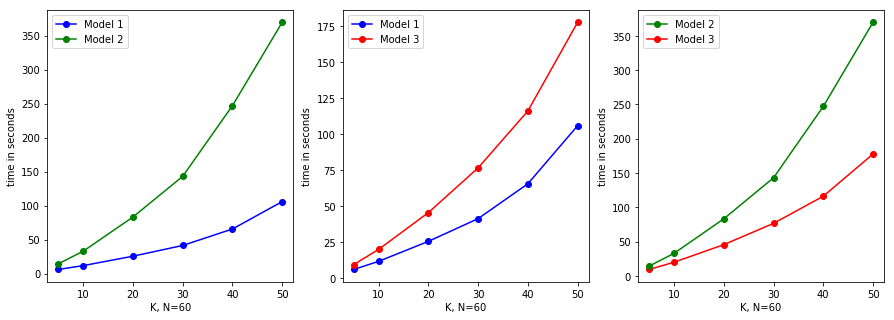

In [73]:
ax = plt.subplot(131)
ax.set_xlabel('K, N=60')
ax.set_ylabel('time in seconds')
m1ms,=plt. plot(k_values, model1_seconds,linestyle='-', marker='o', color='b', label = 'Model 1')
m2ms,=plt. plot(k_values, model2_total_time,linestyle='-', marker='o', color='g', label = 'Model 2')

#m1s,=plt. plot(k_values, model1_seconds_model,linestyle='--', marker='o', color='b', label = 'Solver')
plt.legend(handles=[m1ms, m2ms])
ax = plt.subplot(132)
ax.set_xlabel('K, N=60')
ax.set_ylabel('time in seconds')
m1ms,=plt. plot(k_values, model1_seconds,linestyle='-', marker='o', color='b', label = 'Model 1')
m3ms,=plt. plot(k_values, model3_seconds,linestyle='-', marker='o', color='r', label = 'Model 3')

#m2ms,=plt. plot(k_values, model2_total_time,linestyle='-', marker='o', color='g', label = 'Model+Solver')
#m2s,=plt. plot(k_values, model2_solver_time,linestyle='--', marker='o', color='g', label = 'Solver')
plt.legend(handles=[m1ms, m3ms])
ax = plt.subplot(133)
ax.set_xlabel('K, N=60')
ax.set_ylabel('time in seconds')
m3ms,=plt. plot(k_values, model3_seconds,linestyle='-', marker='o', color='r', label = 'Model 3')
m2ms,=plt. plot(k_values, model2_total_time,linestyle='-', marker='o', color='g', label = 'Model 2')

#m3s,=plt. plot(k_values, model3_seconds_model,linestyle='--', marker='o', color='r', label = 'Solver')
plt.legend(handles=[m2ms, m3ms])
#dif1,=plt. plot(k_values, dif(model1_seconds,model1_seconds_model ),linestyle='-', marker='o', color='b', label = 'Model 1')
#dif2,=plt. plot(k_values, dif(model2_total_time,model2_solver_time ),linestyle='-', marker='o', color='b', label = 'Model 1')
#dif3,=plt. plot(k_values, dif(model3_seconds,model3_seconds_model ),linestyle='-', marker='o', color='b', label = 'Model 1')
#dif1,=plt. plot(k_values, divi(dif(model1_seconds,model1_seconds_model ), k_values),linestyle='-', marker='o', color='r', label = 'Model 1')
#dif2,=plt. plot(k_values, divi(dif(model2_total_time,model2_solver_time ), k_values),linestyle='-', marker='o', color='r', label = 'Model 1')
#dif3,=plt. plot(k_values, divi(dif(model3_seconds,model3_seconds_model ), k_values),linestyle='-', marker='o', color='r', label = 'Model 1')

#plt.legend(handles=[m1, m2, m3])
savefig('/home/agupta/BobSeg/p2.png')

In [ ]:
#mysosin data graph seg
s_myo=[2.978008985519409,
 3.1763010025024414,
 3.8801469802856445,
 4.545492172241211,
 5.216008901596069,
 5.853344917297363]
ax = plt.subplot(121)
ax.set_xlabel('K, N=60')
ax.set_ylabel('time in seconds')
m1,=plt. plot(k_values, model1_seconds,linestyle='-', marker='o', color='b', label = 'ILP Model 1')

#m1,=plt. plot(k_values, model1_seconds_model,linestyle='--', marker='o', color='b', label = 'ILP Model 1')
m2,=plt. plot(k_values, model2_total_time,linestyle='-', marker='o', color='g', label = 'ILP Model 2')
#m2,=plt. plot(k_values, model2_solver_time,linestyle='--', marker='o', color='g', label = 'ILP Model 2')
m3,=plt. plot(k_values, model3_seconds,linestyle='-', marker='o', color='r', label = 'ILP Model 3')
#m3,=plt. plot(k_values, model3_seconds_model,linestyle='--', marker='o', color='r', label = 'ILP Model 3')
g, = plt. plot(k_values, s_myo,linestyle='-', marker='o', color='y', label = 'Graph-cut')
#dif1,=plt. plot(k_values, dif(model1_seconds,model1_seconds_model ),linestyle='-', marker='o', color='b', label = 'Model 1')
#dif2,=plt. plot(k_values, dif(model2_total_time,model2_solver_time ),linestyle='-', marker='o', color='b', label = 'Model 1')
#dif3,=plt. plot(k_values, dif(model3_seconds,model3_seconds_model ),linestyle='-', marker='o', color='b', label = 'Model 1')
#dif1,=plt. plot(k_values, divi(dif(model1_seconds,model1_seconds_model ), k_values),linestyle='-', marker='o', color='r', label = 'Model 1')
#dif2,=plt. plot(k_values, divi(dif(model2_total_time,model2_solver_time ), k_values),linestyle='-', marker='o', color='r', label = 'Model 1')
#dif3,=plt. plot(k_values, divi(dif(model3_seconds,model3_seconds_model ), k_values),linestyle='-', marker='o', color='r', label = 'Model 1')
#m1,=plt. plot(k_values, model1_seconds,linestyle='-', marker='o', color='b', label = 'Model 1')


plt.legend(handles=[m1, m2, m3, g])


ax = plt.subplot(122)
ax.set_xlabel('K, N=60')
ax.set_ylabel('time in seconds')
#m1,=plt. plot(k_values, model1_seconds,linestyle='-', marker='o', color='b', label = 'Model 1')
#m1,=plt. plot(k_values, model1_seconds_model,linestyle='-', marker='o', color='b', label = 'ILP Model 1')

#m2,=plt. plot(k_values, model2_total_time,linestyle='-', marker='o', color='g', label = 'Model 2')
#m2,=plt. plot(k_values, model2_solver_time,linestyle='-', marker='o', color='g', label = 'ILP Model 2')
m3s,=plt. plot(k_values, model3_seconds,linestyle='-', marker='o', color='r', label = 'Model 3')
m3,=plt. plot(k_values, model3_seconds_model,linestyle='-', marker='o', color='r', label = 'ILP Model 3')
g, = plt. plot(k_values, s_myo,linestyle='-', marker='o', color='y', label = 'Graph-cut')

plt.legend(handles=[m3, m3s, g])
plt.show()

#savefig('/home/agupta/BobSeg/plast.png')

In [4]:
#ILP: dataset: myosin 
s1 = [28.43944001197815,
 73.94035315513611,
 254.97083401679993,
 580.0445568561554,
 1000.5802211761475,
 1560.0693039894104]
#ILP: :dataset : MAX_LP320-06-08_Concat-1-50
s2 = [20.529443979263306,
 61.54294800758362,
 213.51692914962769,
 466.0848569869995,
 802.6167759895325,
 1206.7436168193817]
#mysosin data graph seg
s_myo=[2.978008985519409,
 3.1763010025024414,
 3.8801469802856445,
 4.545492172241211,
 5.216008901596069,
 5.853344917297363]
#max data graph seg
s_max=[1.617375135421753,
 1.7298600673675537,
 2.109250068664551,
 2.5566670894622803,
 2.9961509704589844,
 3.4876339435577393]

s3 = [3.610275983810425,
 3.4265048503875732,
 4.426633834838867,
 5.14974308013916,
 6.0820629596710205,
 6.949475049972534]

s4 = [13.884806156158447,
 38.63139319419861,
 142.02862691879272,
 307.0644738674164,
 539.1043970584869,
 832.9239540100098]

s5 = [0.20863103866577148,
 0.5997600555419922,
 1.1454050540924072,
 1.7771799564361572,
 2.4888360500335693,
 3.1418421268463135]


s6 = [1.2542848587036133,
 2.8861448764801025,
 9.647742986679077,
 20.95845103263855,
 34.9245719909668,
 53.65369009971619]

#improved ILP
s7= [5.517287015914917,
 12.318732023239136,
 30.004976987838745,
 54.716350078582764,
 83.08776998519897,
 127.65262198448181]

In [ ]:
#plt.plot(values, s1)
#plt.plot(values, s2)
plt.plot(values, s3)
#plt.plot(values, s4)
#plt.plot(values, s5)
plt.plot(values, s7)

## Setting up parameters
N = number of columns  <br />
K = number of nodes on each column  <br />
max_delta_k = adjacent nodes  <br />
T = number of time frames  <br />
max_delta_time = parameter to intrcorporate temporal smoothness  <br />

In [ ]:
frame = 0
fig = plt.figure()
ax = plt.subplot(131)
ax.imshow(images[frame], plt.get_cmap('gray'))


patches = [] # collects patches to be plotted
patches.append( ILP.Ellipse((center[0],center[1]),
                        width=(min_radius[0]*2),
                        height=(min_radius[1])*2) )
patches.append( ILP.Ellipse((center[0],center[1]),
                        width=(max_radius[0]*2),
                        height=(max_radius[1]*2)) )
p = ILP.PatchCollection(patches, cmap=matplotlib.cm.jet, alpha=0.3, color='yellow')
ax.add_collection(p)

In [ ]:
def plot_surfaces(T, images, surfaces, folder):
    for t in range(T):
        fig = plt.figure()
        ax = plt.subplot()
        ax.imshow(images[t], plt.get_cmap('gray'))
        patches = [] 
        polygon = Polygon(surfaces[t], True)
        patches.append(polygon)
        p = ILP.PatchCollection(patches, cmap=matplotlib.cm.jet, alpha=0.4, color='blue')
        ax.add_collection(p)
        savefig(folder + 'frame' + str(t) + '.png')

In [ ]:
%%capture

surfaces = ILP.get_surfaces(T, N, K, min_radius, max_radius, center, m, vv )
#folder = '/home/agupta/BobSeg/ILP_TEST_OUTPUTS/' + name
folder = '/home/agupta/BobSeg/ILP_TEST_OUTPUTS/' + name+ '_alpha1beta005_'

plot_surfaces(T, images, surfaces, folder)

In [ ]:
surfaces = []
temp_vv = m.getAttr("X", vv)
col_vectors = ILP.sample_circle(N)

for t in range(T):
    surface = []
    for i in range(N):
        from_x = int(center[0] + col_vectors[i,0]*min_radius[0])
        from_y = int(center[1] + col_vectors[i,1]*min_radius[1])
        to_x = int(center[0] + col_vectors[i,0]*max_radius[0])
        to_y = int(center[1] + col_vectors[i,1]*max_radius[1])
        coords = ILP.bham.bresenhamline(np.array([[from_x, from_y]]), np.array([[to_x, to_y]]))
        num_pixels = len(coords)
        for k in range(K):
            if(temp_vv[(i*K+k)*T+t] == 1 and k !=0):
                #print k
                #k +=1
                start = int(k * float(num_pixels)/K)
                end = max( start+1, start + num_pixels/K )
                x = int(center[0] + col_vectors[i,0] * 
                    min_radius[0] + col_vectors[i,0] * 
                    (k-1)/float(K) * (max_radius[0]-min_radius[0]) )
                y = int(center[1] + col_vectors[i,1] * 
                    min_radius[1] + col_vectors[i,1] * 
                    (k-1)/float(K) * (max_radius[1]-min_radius[1]) )
                surface.append((coords[(start+end)/2][0],coords[(start+end)/2][1]))
                #surface.append((x,y))
    surface.append(surface[0])
    surfaces.append(surface)
    
for t in range(T):
    fig = plt.figure()
    ax = plt.subplot()
    ax.imshow(images[t], plt.get_cmap('gray'))
    patches = [] 
    polygon = Polygon(surfaces[t], True)
    patches.append(polygon)
    p = ILP.PatchCollection(patches, cmap=matplotlib.cm.jet, alpha=0.4, color='blue')
    ax.add_collection(p)
    for i in range(N):
        
        #print coords.shape[0]
        #for temp in range(coords.shape[0]):
           # ax.scatter(coords[temp][0],coords[temp][1], c='y', marker='.')
        from_x = int(center[0] + col_vectors[i,0]*min_radius[0])
        from_y = int(center[1] + col_vectors[i,1]*min_radius[1])
        to_x = int(center[0] + col_vectors[i,0]*max_radius[0])
        to_y = int(center[1] + col_vectors[i,1]*max_radius[1])
        coords = ILP.bham.bresenhamline(np.array([[from_x, from_y]]), np.array([[to_x, to_y]]))
        
        #ax.scatter(from_x,from_y, c='r', marker='x')
        #ax.scatter(to_x,to_y, c='r', marker='x')
        num_pixels = len(coords)
        for k in range(K):
            if(temp_vv[(i*K+k)*T+t] == 1 and k!=0):
                
                start = int(k * float(num_pixels)/K)
                end = max( start+1, start + num_pixels/K )
                #print i,k
                k += 1
                x = int(center[0] + col_vectors[i,0] * 
                    min_radius[0] + col_vectors[i,0] * 
                    (k-1)/float(K) * (max_radius[0]-min_radius[0]) )
                y = int(center[1] + col_vectors[i,1] * 
                    min_radius[1] + col_vectors[i,1] * 
                    (k-1)/float(K) * (max_radius[1]-min_radius[1]) )
                ax.scatter(x,y, c='y', marker='x')
                ax.scatter(coords[(start+end)/2][0], coords[(start+end)/2][1], marker = 'o')
        ax.imshow(images[t], plt.get_cmap('gray'))
        #savefig(folder + 'frame_' + str(t) + '.png')

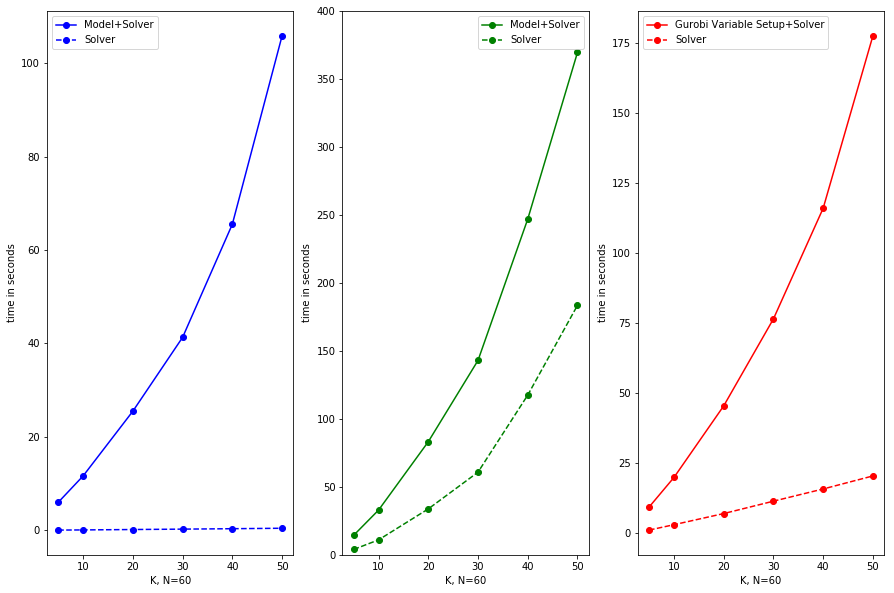

In [31]:
print num_pixels


In [ ]:
ax = plt.subplot(121)

ax.set_xlabel('K, N=60')
ax.set_ylabel('time in seconds')
axes = plt.gca()
axes.set_ylim([0,400])
m1ms,=plt. plot(k_values, model1_seconds,linestyle='-', marker='o', color='b', label = 'Variable setup +Solver')
m1s,=plt. plot(k_values, model1_seconds_model,linestyle='--', marker='o', color='b', label = 'Solver')
plt.legend(handles=[m1ms, m1s])



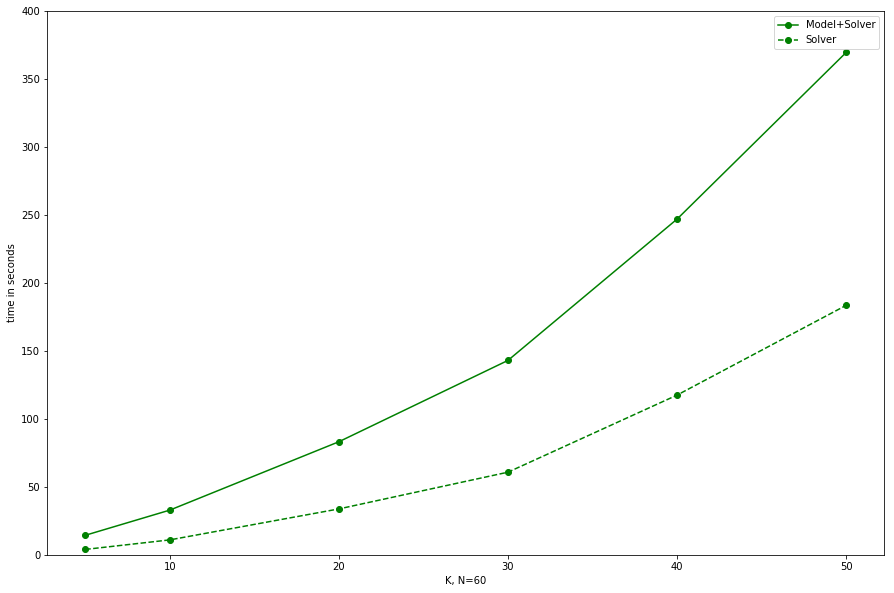

In [37]:
ax = plt.subplot(111)
axes = plt.gca()
axes.set_ylim([0,400])

ax.set_xlabel('K, N=60')
ax.set_ylabel('time in seconds')
m2ms,=plt. plot(k_values, model2_total_time,linestyle='-', marker='o', color='g', label = 'Model+Solver')
m2s,=plt. plot(k_values, model2_solver_time,linestyle='--', marker='o', color='g', label = 'Solver')
plt.legend(handles=[m2ms, m2s])


In [ ]:
ax = plt.subplot(122)
axes = plt.gca()
axes.set_ylim([0,400])
ax.set_xlabel('K, N=60')
ax.set_ylabel('time in seconds')
m3s,=plt. plot(k_values, model3_seconds,linestyle='-', marker='o', color='r', label = 'Model 3')
m3,=plt. plot(k_values, model3_seconds_model,linestyle='-', marker='o', color='r', label = 'ILP Model 3')
plt.legend(handles=[m3ms, m3s])

In [ ]:
ax = plt.subplot(122)
ax.set_xlabel('K, N=60')
ax.set_ylabel('time in seconds')
#m1,=plt. plot(k_values, model1_seconds,linestyle='-', marker='o', color='b', label = 'Model 1')
#m1,=plt. plot(k_values, model1_seconds_model,linestyle='-', marker='o', color='b', label = 'ILP Model 1')

#m2,=plt. plot(k_values, model2_total_time,linestyle='-', marker='o', color='g', label = 'Model 2')
#m2,=plt. plot(k_values, model2_solver_time,linestyle='-', marker='o', color='g', label = 'ILP Model 2')
m3s,=plt. plot(k_values, model3_seconds,linestyle='-', marker='o', color='r', label = 'Model 3')
m3,=plt. plot(k_values, model3_seconds_model,linestyle='-', marker='o', color='r', label = 'ILP Model 3')
g, = plt. plot(k_values, s_myo,linestyle='-', marker='o', color='y', label = 'Graph-cut')

plt.legend(handles=[m3, m3s, g])